# Étape 5 — Interprétation & Visualisation (ANSSI Vulnerability Intelligence)

## Objectif
À partir du fichier consolidé (bulletins + CVE + enrichissements MITRE/EPSS), l’objectif est de **comprendre** les vulnérabilités recensées afin de **prioriser** celles qui nécessitent une attention immédiate.

On analyse notamment :
- **CVSS** : gravité théorique (0 → 10)
- **EPSS** : probabilité d’exploitation (0 → 1)
- **CWE** : type de faiblesse (catégorie de vulnérabilité)
- **Vendor / Product / Versions** : systèmes concernés

## Données utilisées
Ce notebook s’appuie sur les fichiers générés aux étapes précédentes :
- `data/processed/output_bulletins_cves_enriched_features.csv` (dataset principal)
- `data/processed/top10_cves.csv` (top CVE selon le score de risque)
- `data/processed/vendor_summary.csv` (résumé par éditeur)

## Méthode
Pour chaque visualisation :
- nous nettoyons les données 
- nous créeons le graphique *
- nous faisons un interprétation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = "../data/processed/output_bulletins_cves_enriched_features.csv"

df = pd.read_csv(DATA_PATH)

print("✅ Dataset chargé")
print("Lignes :", len(df))
print("Colonnes :", len(df.columns))

df.head(5)


✅ Dataset chargé
Lignes : 1278
Colonnes : 16


,type,published,title,link,cve,description,cvss_score,base_severity,cwe_id,cwe_desc,vendor,product,versions_affectees,epss,risk_score,risk_level
0,avis,"Mon, 08 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans MISP (08 décembr...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-67906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non disponible
1,avis,"Thu, 11 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans Google Chrome (1...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-14174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non disponible
2,avis,"Thu, 11 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans Google Chrome (1...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-14372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non disponible
3,avis,"Thu, 11 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans Google Chrome (1...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-14373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non disponible
4,avis,"Fri, 12 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans Microsoft Edge (...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-14174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non disponible


In [5]:
# On garde uniquement les lignes avec un score CVSS valide
df_cvss = df.dropna(subset=["cvss_score"])

print("Nombre total de lignes :", len(df))
print("Nombre de lignes avec CVSS :", len(df_cvss))


Nombre total de lignes : 1278
Nombre de lignes avec CVSS : 27


Nombre total de vulnérabilités : 1278
Nombre de vulnérabilités avec score CVSS : 27


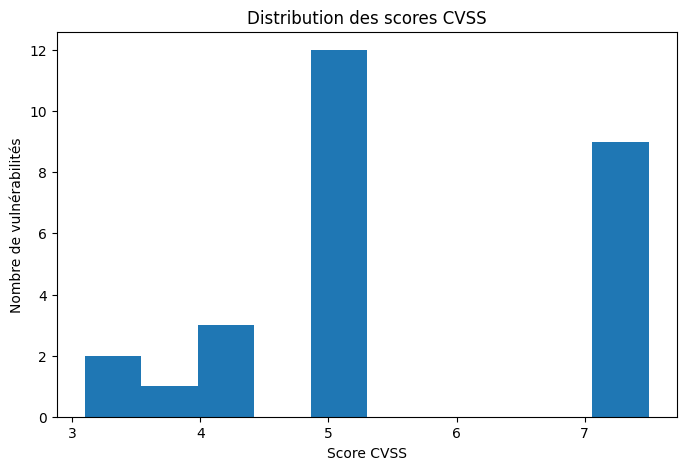

In [6]:
# Histogramme des scores CVSS

# On garde uniquement les lignes avec un score CVSS valide
df_cvss = df.dropna(subset=["cvss_score"])

print("Nombre total de vulnérabilités :", len(df))
print("Nombre de vulnérabilités avec score CVSS :", len(df_cvss))


plt.figure(figsize=(8, 5))
plt.hist(df_cvss["cvss_score"], bins=10)

plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")

plt.show()


Ce graphique montre que la majorité des vulnérabilités recensées présentent un score CVSS moyen, tandis qu’un sous-ensemble plus restreint atteint des niveaux de gravité élevés. Cela indique que, bien que les vulnérabilités critiques soient minoritaires, elles existent et nécessitent une priorisation spécifique.
Le score CVSS seul ne permet pas d’identifier les vulnérabilités les plus urgentes à corriger, car une vulnérabilité de gravité moyenne peut représenter un risque important si elle est activement exploitée.
Ces résultats justifient l’utilisation conjointe du score EPSS afin d’affiner la priorisation des vulnérabilités réellement dangereuses.

In [7]:
# On garde uniquement les lignes avec un CWE connu
df_cwe = df.dropna(subset=["cwe_id"])

print("Nombre total de vulnérabilités :", len(df))
print("Nombre avec CWE identifié :", len(df_cwe))

# Compter les CWE
cwe_counts = df_cwe["cwe_id"].value_counts()

# On garde les 10 CWE les plus fréquents pour la lisibilité
top_cwe = cwe_counts.head(10)

top_cwe


Nombre total de vulnérabilités : 1278
Nombre avec CWE identifié : 94


cwe_id
Non disponible    86
CWE-674            2
CWE-20             2
CWE-502            1
CWE-378            1
CWE-1333           1
CWE-233            1
Name: count, dtype: int64

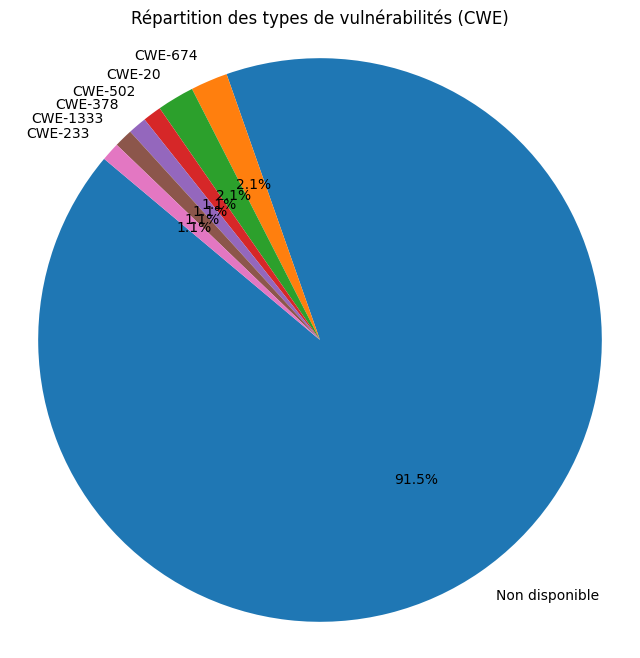

In [8]:
plt.figure(figsize=(8, 8))

plt.pie(
    top_cwe.values,
    labels=top_cwe.index,
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Répartition des types de vulnérabilités (CWE)")
plt.axis("equal")  # Pour un cercle bien rond
plt.show()


Cette visualisation met en évidence un manque important d’information concernant la classification des vulnérabilités selon le standard CWE. La majorité des CVE ne disposent pas d’un type de faiblesse clairement identifié.
Cette absence de classification limite les analyses basées uniquement sur la nature des vulnérabilités (injection, overflow, etc.) et souligne la dépendance à la qualité des données fournies par les sources externes.
**En pratique, les critères d’alerte doivent principalement s’appuyer sur les scores CVSS et EPSS, tout en exploitant les CWE disponibles pour des analyses ciblées lorsque l’information est présente.**

In [10]:
# On garde uniquement les vulnérabilités avec un score EPSS
df_epss = df.dropna(subset=["epss"])

print("Nombre total de vulnérabilités :", len(df))
print("Nombre avec EPSS :", len(df_epss))

df_epss["epss"].describe()


Nombre total de vulnérabilités : 1278
Nombre avec EPSS : 92


count    92.000000
mean      0.033740
std       0.123736
min       0.000080
25%       0.000333
50%       0.001120
75%       0.010345
max       0.920530
Name: epss, dtype: float64

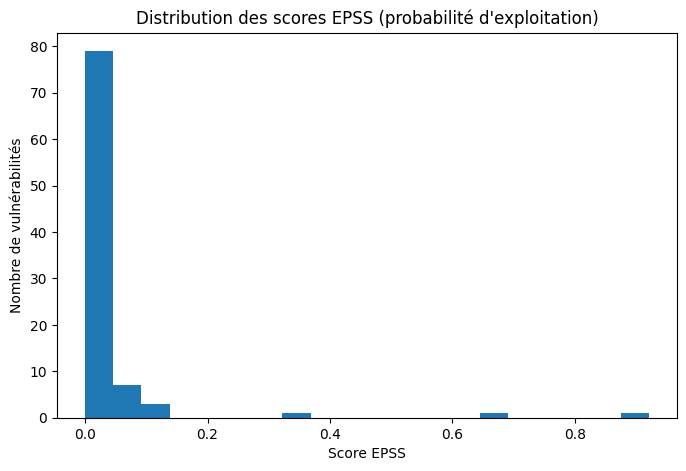

In [11]:
plt.figure(figsize=(8, 5))

plt.hist(df_epss["epss"], bins=20)

plt.xlabel("Score EPSS")
plt.ylabel("Nombre de vulnérabilités")
plt.title("Distribution des scores EPSS (probabilité d'exploitation)")
plt.show()


Ce graphique montre que la majorité des vulnérabilités ont une probabilité d’exploitation faible, tandis qu’un nombre restreint présente une probabilité significativement plus élevée.
Contrairement au score CVSS, le score EPSS permet d’identifier les vulnérabilités réellement susceptibles d’être exploitées à court terme, même lorsque leur gravité intrinsèque est modérée.
Les vulnérabilités présentant un score EPSS élevé doivent être traitées en priorité, indépendamment de leur score CVSS, car elles représentent un risque opérationnel immédiat.

In [12]:
# On enlève les lignes sans éditeur (normal, certaines CVE n'ont pas l'info)
df_vendor = df.dropna(subset=["vendor"])

vendor_counts = (
    df_vendor
    .groupby("vendor")
    .size()
    .sort_values(ascending=False)
)


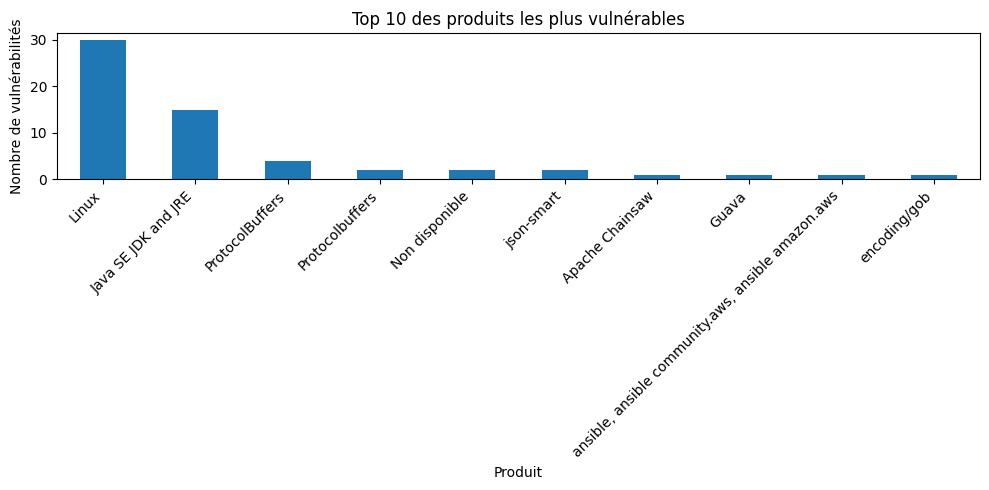

In [13]:
df_product = df.dropna(subset=["product"])

product_counts = (
    df_product
    .groupby("product")
    .size()
    .sort_values(ascending=False)
)

top_products = product_counts.head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar")

plt.title("Top 10 des produits les plus vulnérables")
plt.xlabel("Produit")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Linux et Java SE / JDK dominent

Présence de produits très génériques ou de labels flous (“Non disponible”)

Ces résultats permettent d’identifier les technologies critiques à surveiller en priorité et justifient la mise en place d’alertes spécifiques par produit ou par éditeur.

In [14]:
# On garde uniquement les vulnérabilités avec CVSS ET EPSS
df_corr = df.dropna(subset=["cvss_score", "epss"])

print("Nombre total de vulnérabilités :", len(df))
print("Nombre avec CVSS + EPSS :", len(df_corr))

df_corr[["cvss_score", "epss"]].describe()


Nombre total de vulnérabilités : 1278
Nombre avec CVSS + EPSS : 27


,cvss_score,epss
count,27.000000,27.000000
mean,5.700000,0.004537
std,1.425051,0.012417
min,3.100000,0.000120
25%,5.300000,0.000740
50%,5.300000,0.001120
75%,7.500000,0.001825
max,7.500000,0.064620


In [15]:
correlation = df_corr[["cvss_score", "epss"]].corr()
correlation


,cvss_score,epss
cvss_score,1.00000,-0.03447
epss,-0.03447,1.00000


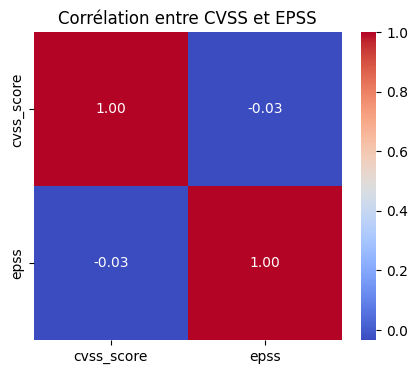

In [16]:
import seaborn as sns

plt.figure(figsize=(5, 4))

sns.heatmap(
    correlation,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)

plt.title("Corrélation entre CVSS et EPSS")
plt.show()


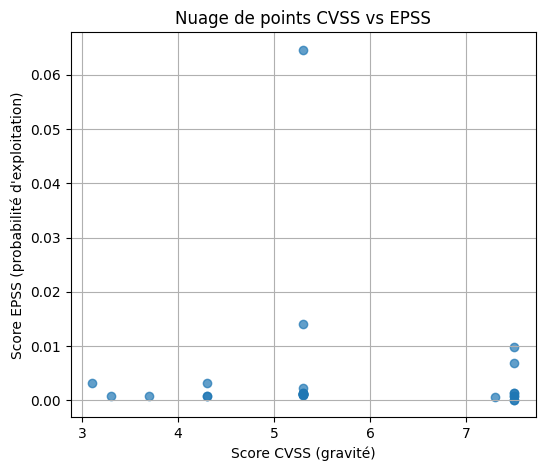

In [17]:
plt.figure(figsize=(6, 5))

plt.scatter(
    df_corr["cvss_score"],
    df_corr["epss"],
    alpha=0.7
)

plt.xlabel("Score CVSS (gravité)")
plt.ylabel("Score EPSS (probabilité d'exploitation)")
plt.title("Nuage de points CVSS vs EPSS")

plt.grid(True)
plt.show()


In [18]:
# Conversion de la colonne published en vrai type date
df_time = df.copy()
df_time["published"] = pd.to_datetime(df_time["published"], errors="coerce")

# On enlève les lignes sans date valide
df_time = df_time.dropna(subset=["published"])

print("Dates min / max :", df_time["published"].min(), "→", df_time["published"].max())

df_time = df_time.sort_values("published")
df_time["cumulative_vulns"] = range(1, len(df_time) + 1)


Dates min / max : 2025-12-08 00:00:00+00:00 → 2026-01-02 00:00:00+00:00


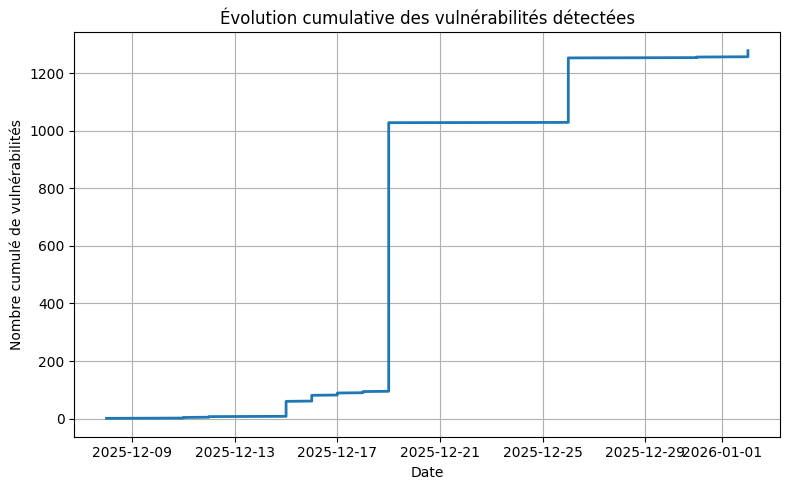

In [19]:
plt.figure(figsize=(8, 5))

plt.plot(
    df_time["published"],
    df_time["cumulative_vulns"],
    linewidth=2
)

plt.xlabel("Date")
plt.ylabel("Nombre cumulé de vulnérabilités")
plt.title("Évolution cumulative des vulnérabilités détectées")

plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# On garde uniquement les lignes avec :
# - un éditeur connu
# - un score CVSS valide
df_box = df.dropna(subset=["vendor", "cvss_score"])

print("Nombre de lignes exploitables :", len(df_box))


Nombre de lignes exploitables : 24


In [21]:
# On sélectionne les éditeurs les plus représentés
top_vendors = (
    df_box["vendor"]
    .value_counts()
    .head(8)   # tu peux ajuster (5, 10…)
    .index
)

df_box_top = df_box[df_box["vendor"].isin(top_vendors)]

print("Éditeurs analysés :", list(top_vendors))


Éditeurs analysés : ['Oracle Corporation', 'Google', 'Google LLC', 'json-smart']


<Figure size 1000x500 with 0 Axes>

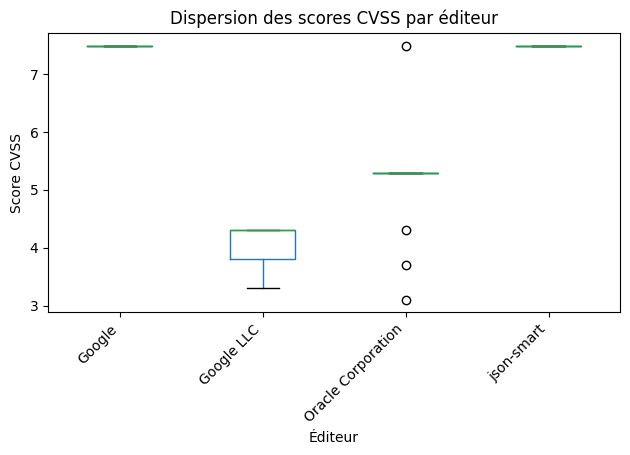

In [22]:
plt.figure(figsize=(10, 5))

df_box_top.boxplot(
    column="cvss_score",
    by="vendor",
    grid=False
)

plt.title("Dispersion des scores CVSS par éditeur")
plt.suptitle("")  # enlève le titre automatique
plt.xlabel("Éditeur")
plt.ylabel("Score CVSS")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [24]:
df_cwe = df.dropna(subset=["cwe_id"])

print("Nombre de vulnérabilités avec un CWE :", len(df_cwe))
df_cwe["cwe_id"].value_counts().head(10)


Nombre de vulnérabilités avec un CWE : 94


cwe_id
Non disponible    86
CWE-674            2
CWE-20             2
CWE-502            1
CWE-378            1
CWE-1333           1
CWE-233            1
Name: count, dtype: int64

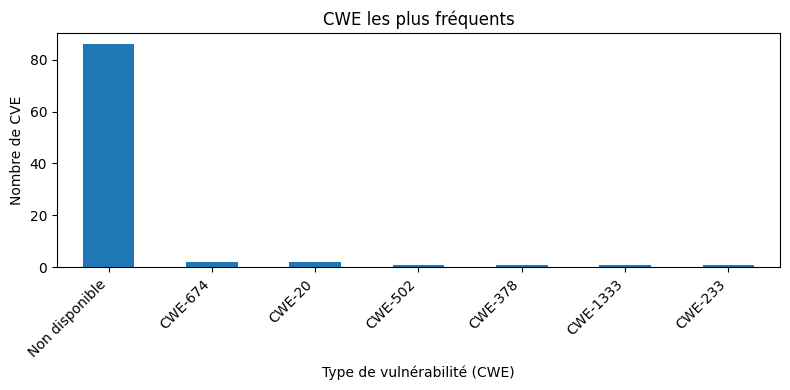

In [25]:
#Quels type de vulnerabilités reviennent le plus souvent ?

top_cwe = df_cwe["cwe_id"].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_cwe.plot(kind="bar")

plt.title("CWE les plus fréquents")
plt.xlabel("Type de vulnérabilité (CWE)")
plt.ylabel("Nombre de CVE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<Figure size 900x400 with 0 Axes>

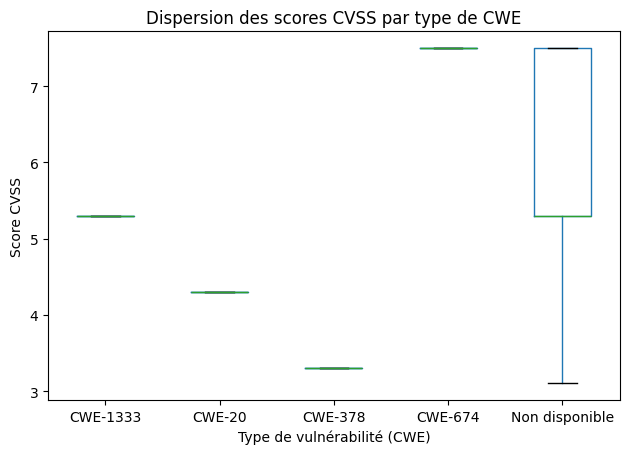

In [26]:
df_cwe_cvss = df.dropna(subset=["cwe_id", "cvss_score"])

top_cwe_list = (
    df_cwe_cvss["cwe_id"]
    .value_counts()
    .head(6)
    .index
)

df_cwe_cvss_top = df_cwe_cvss[df_cwe_cvss["cwe_id"].isin(top_cwe_list)]

plt.figure(figsize=(9, 4))
df_cwe_cvss_top.boxplot(column="cvss_score", by="cwe_id", grid=False)

plt.title("Dispersion des scores CVSS par type de CWE")
plt.suptitle("")
plt.xlabel("Type de vulnérabilité (CWE)")
plt.ylabel("Score CVSS")
plt.tight_layout()
plt.show()


<Figure size 900x400 with 0 Axes>

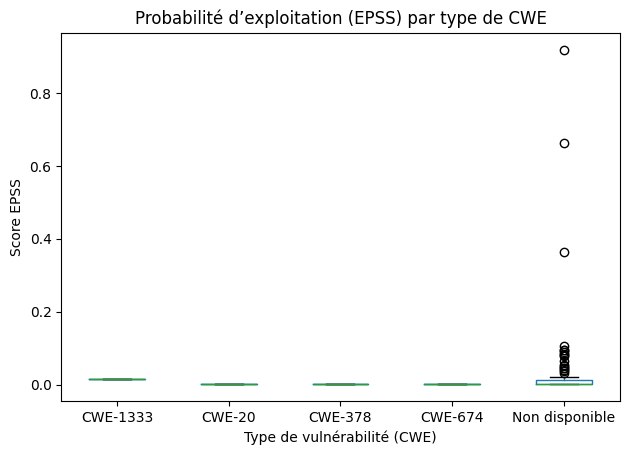

In [27]:
df_cwe_epss = df.dropna(subset=["cwe_id", "epss"])

df_cwe_epss_top = df_cwe_epss[df_cwe_epss["cwe_id"].isin(top_cwe_list)]

plt.figure(figsize=(9, 4))
df_cwe_epss_top.boxplot(column="epss", by="cwe_id", grid=False)

plt.title("Probabilité d’exploitation (EPSS) par type de CWE")
plt.suptitle("")
plt.xlabel("Type de vulnérabilité (CWE)")
plt.ylabel("Score EPSS")
plt.tight_layout()
plt.show()


In [ ]:
#et si on visualiser sur un cwe précis ?

cwe_focus = "CWE-79" #c'est un exemple mais on peut changer

df_focus = df[df["cwe_id"] == cwe_focus]

print(f"Nombre de vulnérabilités pour {cwe_focus} :", len(df_focus))

df_focus[["cvss_score", "epss"]].describe()


Nombre de vulnérabilités pour CWE-79 : 0


,cvss_score,epss
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


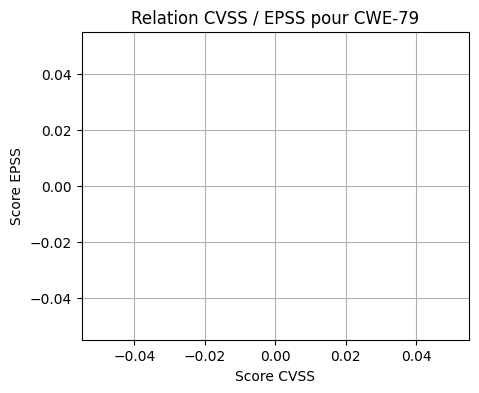

In [29]:
plt.figure(figsize=(5, 4))
plt.scatter(df_focus["cvss_score"], df_focus["epss"], alpha=0.6)

plt.title(f"Relation CVSS / EPSS pour {cwe_focus}")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.show()


In [30]:
# Copie de travail
df_time = df.copy()

# Conversion de la colonne published en datetime
df_time["published"] = pd.to_datetime(
    df_time["published"],
    errors="coerce"
)

# On enlève les lignes sans date valide
df_time = df_time.dropna(subset=["published"])

print("Nombre de vulnérabilités avec date valide :", len(df_time))


Nombre de vulnérabilités avec date valide : 1278


In [31]:
# On regroupe par mois
vulns_per_month = (
    df_time
    .set_index("published")
    .resample("M")
    .size()
)

vulns_per_month.head()


C:\Users\elfde\AppData\Local\Temp\ipykernel_49724\309940110.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time


published
2025-12-31 00:00:00+00:00    1256
2026-01-31 00:00:00+00:00      22
Freq: ME, dtype: int64

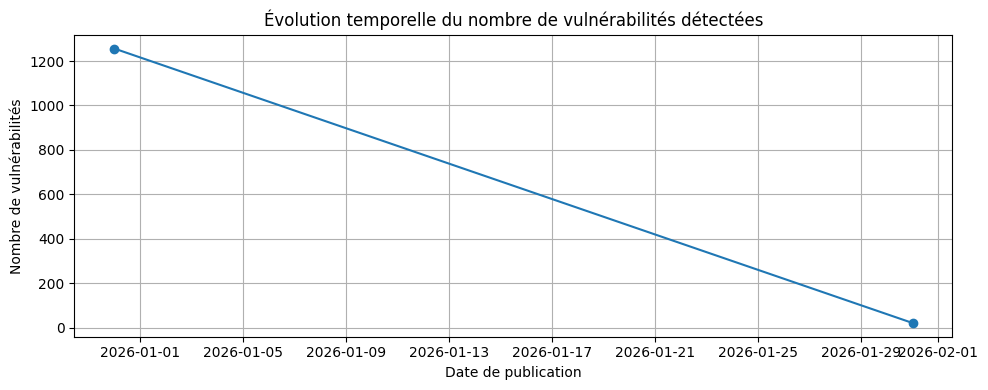

In [32]:
plt.figure(figsize=(10, 4))

plt.plot(
    vulns_per_month.index,
    vulns_per_month.values,
    marker="o"
)

plt.title("Évolution temporelle du nombre de vulnérabilités détectées")
plt.xlabel("Date de publication")
plt.ylabel("Nombre de vulnérabilités")
plt.grid(True)

plt.tight_layout()
plt.show()


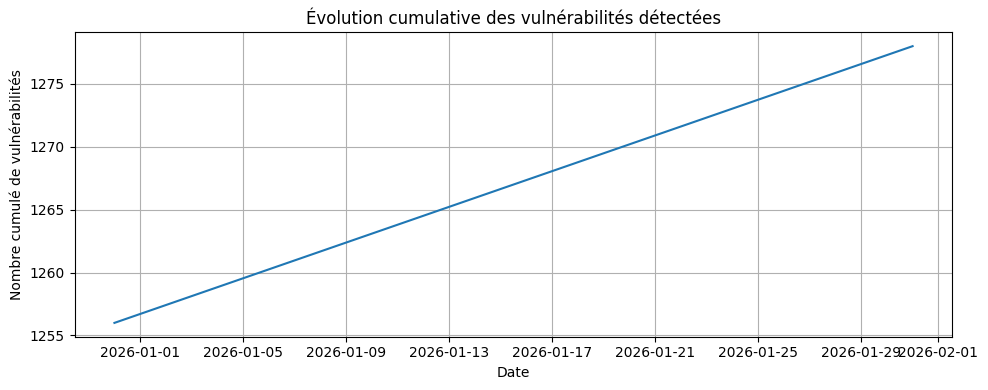

In [33]:
cumulative_vulns = vulns_per_month.cumsum()

plt.figure(figsize=(10, 4))
plt.plot(
    cumulative_vulns.index,
    cumulative_vulns.values
)

plt.title("Évolution cumulative des vulnérabilités détectées")
plt.xlabel("Date")
plt.ylabel("Nombre cumulé de vulnérabilités")
plt.grid(True)

plt.tight_layout()
plt.show()


In [36]:
# On garde uniquement les lignes avec des versions renseignées
df_versions = df.dropna(subset=["versions_affectees"])

print("Nombre de vulnérabilités avec version connue :", len(df_versions))

df_versions[["vendor", "product", "versions_affectees"]].head()


Nombre de vulnérabilités avec version connue : 63


,vendor,product,versions_affectees
98,Linux,Linux,b9d43bcd061956c8144bcb453d07d13236b6ab28
99,Linux,Linux,e13e02a3c68d899169c78d9a18689bd73491d59a
100,Linux,Linux,1da177e4c3f41524e886b7f1b8a0c1fc7321cac2
101,Linux,Linux,3df91ea20e744344100b10ae69a17211fcf5b207
102,Non disponible,Non disponible,Non disponible


In [38]:
# Séparer les versions multiples en lignes distinctes
df_versions_expanded = (
    df_versions
    .assign(versions=df_versions["versions_affectees"].str.split(","))
    .explode("versions_affectees")
)

# Nettoyage des espaces
df_versions_expanded["versions_affectees"] = df_versions_expanded["versions_affectees"].str.strip()

df_versions_expanded.head()


,type,published,title,link,cve,description,cvss_score,base_severity,cwe_id,cwe_desc,vendor,product,versions_affectees,epss,risk_score,risk_level,versions
98,avis,"Fri, 19 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans le noyau Linux d...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2022-48701,"In the Linux kernel, the following vulnerabili...",NaN,Non disponible,Non disponible,Non disponible,Linux,Linux,b9d43bcd061956c8144bcb453d07d13236b6ab28,0.00008,NaN,Non disponible,[b9d43bcd061956c8144bcb453d07d13236b6ab28]
99,avis,"Fri, 19 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans le noyau Linux d...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2022-50356,"In the Linux kernel, the following vulnerabili...",NaN,Non disponible,Non disponible,Non disponible,Linux,Linux,e13e02a3c68d899169c78d9a18689bd73491d59a,0.00017,NaN,Non disponible,[e13e02a3c68d899169c78d9a18689bd73491d59a]
100,avis,"Fri, 19 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans le noyau Linux d...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2022-50367,"In the Linux kernel, the following vulnerabili...",NaN,Non disponible,Non disponible,Non disponible,Linux,Linux,1da177e4c3f41524e886b7f1b8a0c1fc7321cac2,0.00016,NaN,Non disponible,[1da177e4c3f41524e886b7f1b8a0c1fc7321cac2]
101,avis,"Fri, 19 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans le noyau Linux d...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2022-50386,"In the Linux kernel, the following vulnerabili...",NaN,Non disponible,Non disponible,Non disponible,Linux,Linux,3df91ea20e744344100b10ae69a17211fcf5b207,0.00083,NaN,Non disponible,[3df91ea20e744344100b10ae69a17211fcf5b207]
102,avis,"Fri, 19 Dec 2025 00:00:00 +0000",Multiples vulnérabilités dans le noyau Linux d...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2022-50403,Non disponible,NaN,Non disponible,Non disponible,Non disponible,Non disponible,Non disponible,Non disponible,NaN,NaN,Non disponible,[Non disponible]


In [39]:
version_counts = (
    df_versions_expanded["versions_affectees"]
    .value_counts()
    .head(10)
)

version_counts


versions_affectees
Oracle GraalVM Enterprise Edition:20.3.4, Oracle GraalVM Enterprise Edition:21.3.0, Oracle Java SE:11.0.13, Oracle Java SE:17.0.1, Oracle Java SE:7u321, Oracle Java SE:8u311    11
3.16.0, 3.19.0, 3.20.0, 3.21.0                                                                                                                                                    4
1da177e4c3f41524e886b7f1b8a0c1fc7321cac2                                                                                                                                          3
Non disponible                                                                                                                                                                    3
0                                                                                                                                                                                 3
5e5d49422dfb035ca9e280cd61d434095c151272                                         

C:\Users\elfde\AppData\Local\Temp\ipykernel_49724\3555516779.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


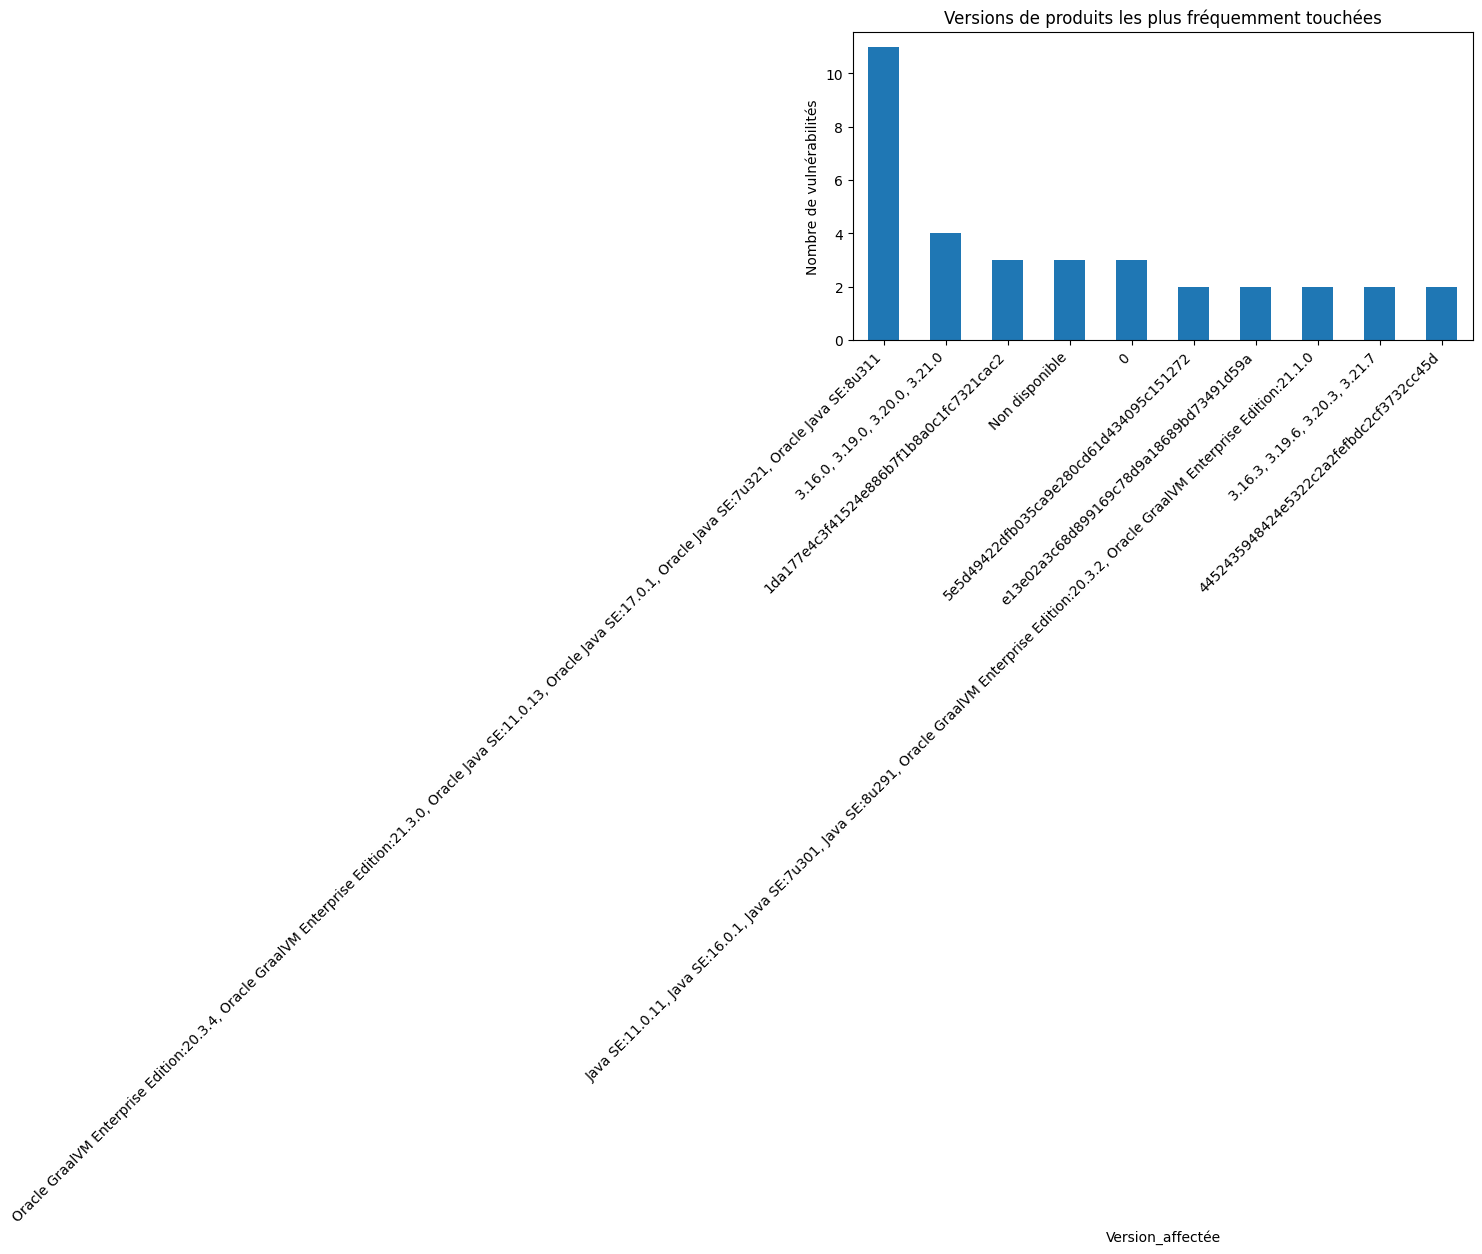

In [40]:
plt.figure(figsize=(8, 4))
version_counts.plot(kind="bar")

plt.title("Versions de produits les plus fréquemment touchées")
plt.xlabel("Version_affectée")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


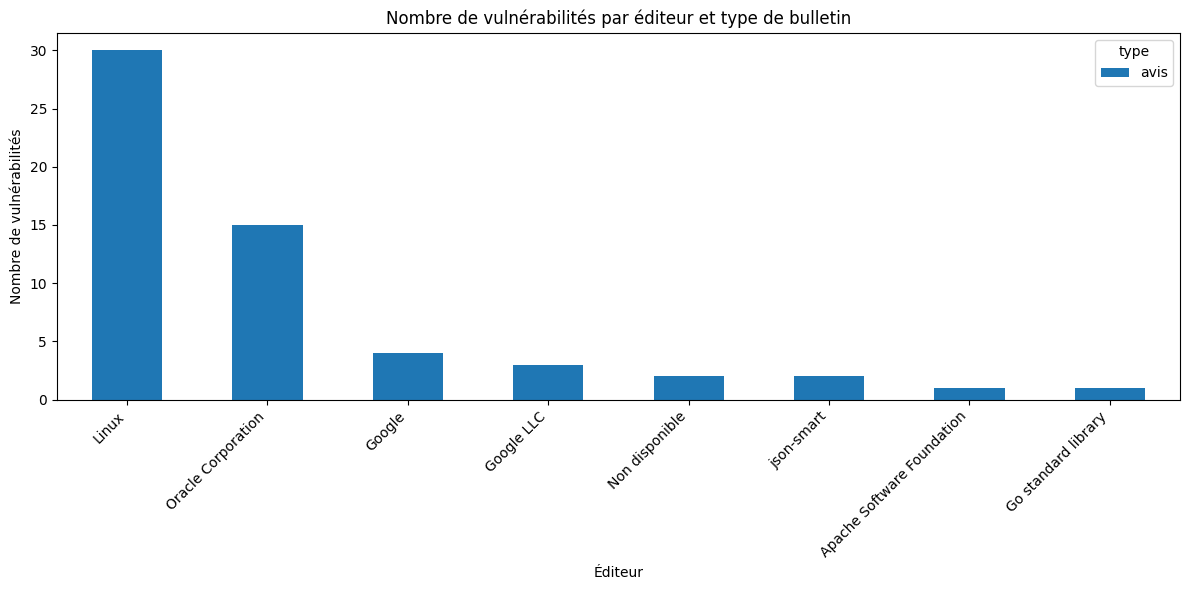

In [41]:
import matplotlib.pyplot as plt

# On garde uniquement les lignes avec un éditeur connu
df_vendor = df.dropna(subset=["vendor"])

# Comptage par éditeur ET type de bulletin
vendor_type_counts = (
    df_vendor
    .groupby(["vendor", "type"])
    .size()
    .unstack(fill_value=0)
    .sort_values(by=list(df_vendor["type"].unique()), ascending=False)
)

# On affiche les éditeurs les plus touchés (ex: top 10)
top_vendors = vendor_type_counts.head(10)

top_vendors.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.title("Nombre de vulnérabilités par éditeur et type de bulletin")
plt.xlabel("Éditeur")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

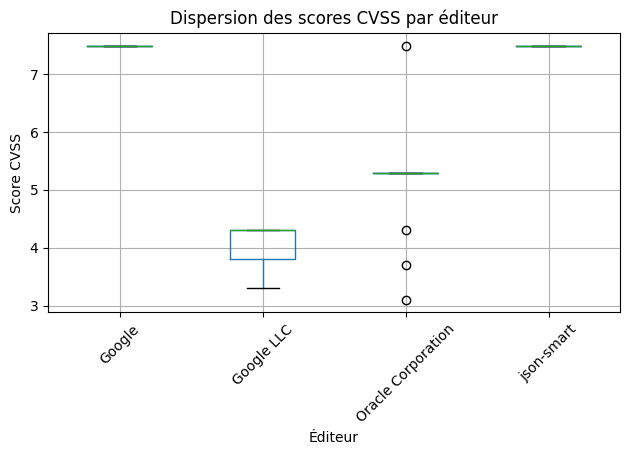

In [43]:
# On garde les lignes exploitables
df_cvss_vendor = df.dropna(subset=["vendor", "cvss_score"])

# Top éditeurs par nombre de vulnérabilités
top_vendor_names = (
    df_cvss_vendor["vendor"]
    .value_counts()
    .head(10)
    .index
)

df_top_vendors = df_cvss_vendor[df_cvss_vendor["vendor"].isin(top_vendor_names)]

# Boxplot
plt.figure(figsize=(14, 6))
df_top_vendors.boxplot(
    column="cvss_score",
    by="vendor",
    rot=45
)

plt.title("Dispersion des scores CVSS par éditeur")
plt.suptitle("")  # enlève le titre automatique pandas
plt.xlabel("Éditeur")
plt.ylabel("Score CVSS")
plt.tight_layout()
plt.show()
